In [1]:
import matplotlib.pyplot as plt
import train, frozen
import sys
sys.path.insert(0, "../../")
import supervised_convnet
import pickle
from collections import defaultdict
import numpy as np
from matplotlib import rc
rc('font',**{'size': 20})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

Uncorrelated [[ 1  1  1 -1 -1 -1  1 -1 -1]
 [ 1  1  1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1 -1  1  1  1  1  1]
 [ 1  1 -1  1 -1 -1 -1 -1 -1]
 [ 1  1 -1  1 -1 -1 -1 -1 -1]
 [ 1  1  1  1 -1 -1 -1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1  1]
 [ 1 -1 -1 -1 -1 -1  1  1  1]
 [ 1  1  1 -1 -1 -1  1  1 -1]]
Correlated [[ 1  1 -1  1 -1 -1 -1 -1  1]
 [ 1  1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1 -1 -1 -1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1  1  1  1]
 [ 1 -1 -1 -1 -1  1  1  1  1]
 [-1 -1 -1 -1 -1  1  1  1  1]
 [-1 -1 -1 -1 -1  1  1 -1 -1]
 [-1 -1 -1 -1 -1 -1  1  1  1]
 [-1 -1  1 -1 -1 -1 -1 -1  1]]


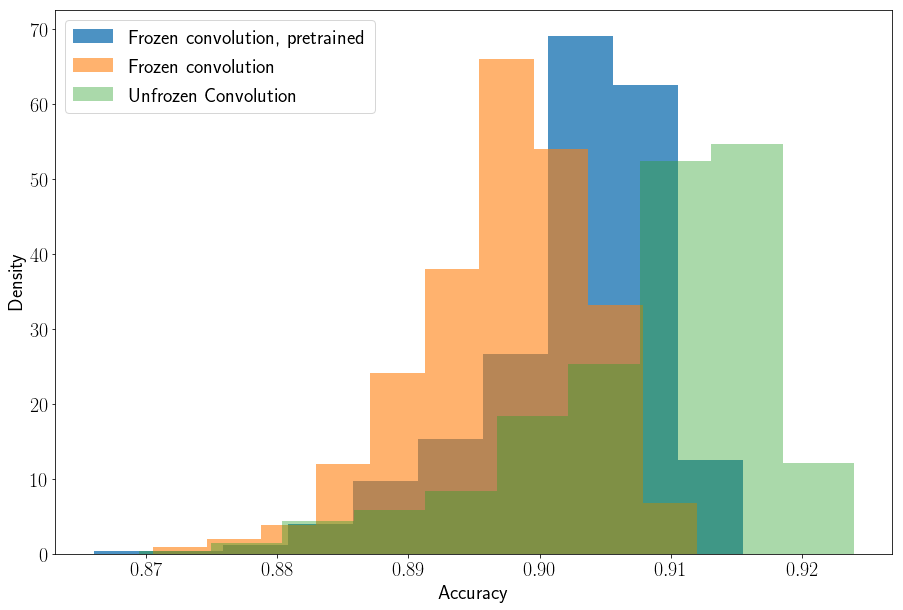

In [10]:
filenames = ["frozen_convolution_pretrained_relu.pl", "frozen_convolution_no_center_relu.pl",
        "unfrozen_convolution_relu.pl"]#, "frozen_convolution_with_center_relu.pl"]
labels = ["Frozen convolution, pretrained", "Frozen convolution",
"Unfrozen Convolution", "frozen convolution with center relu"]
alphas = [0.8, 0.6, 0.4, 0.2]
plt.figure(figsize=(15,10))
plt.xlabel("Accuracy")
plt.ylabel("Density")
for index, filename in enumerate(filenames[:3]):
    with open(filename, "rb") as handle:
        results = pickle.load(handle)
    if index <= 2:
        b = np.array(results["best_val_acc_hist"])
        b = (b[b > 0.6])
        plt.hist(b, alpha = alphas[index], label = labels[index], density=True)
    else:
        plt.hist(results, alpha = alphas[index], label = labels[index], normed=True)
    # print("filename", filename)
    # print("mean", np.mean(results))
    # print("std", np.std(results))
plt.legend()

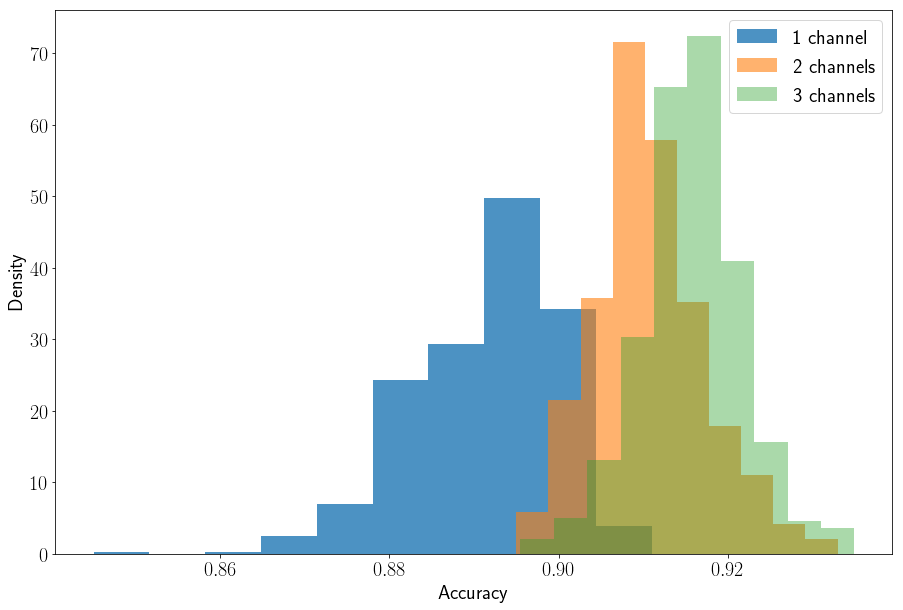

In [7]:
filenames = ["unfrozen_convolution_relu.pl", "unfrozen_convolution_2_channels_relu.pl", "unfrozen_convolution_3_channels_relu.pl",
        ]#, "frozen_convolution_with_center_relu.pl"]
labels = ["1 channel","2 channels", "3 channels", "frozen convolution with center relu"]
alphas = [0.8, 0.6, 0.4, 0.2]
plt.figure(figsize=(15,10))
plt.xlabel("Accuracy")
plt.ylabel("Density")
for index, filename in enumerate(filenames[:3]):
    with open(filename, "rb") as handle:
        results = pickle.load(handle)
    if index <= 2:
        b = np.array(results["best_val_acc_hist"])
        b = (b[b > 0.6])
        plt.hist(b, alpha = alphas[index], label = labels[index], density=True)
    else:
        plt.hist(results, alpha = alphas[index], label = labels[index], normed=True)
    # print("filename", filename)
    # print("mean", np.mean(results))
    # print("std", np.std(results))
plt.legend()

axs <class 'numpy.ndarray'>


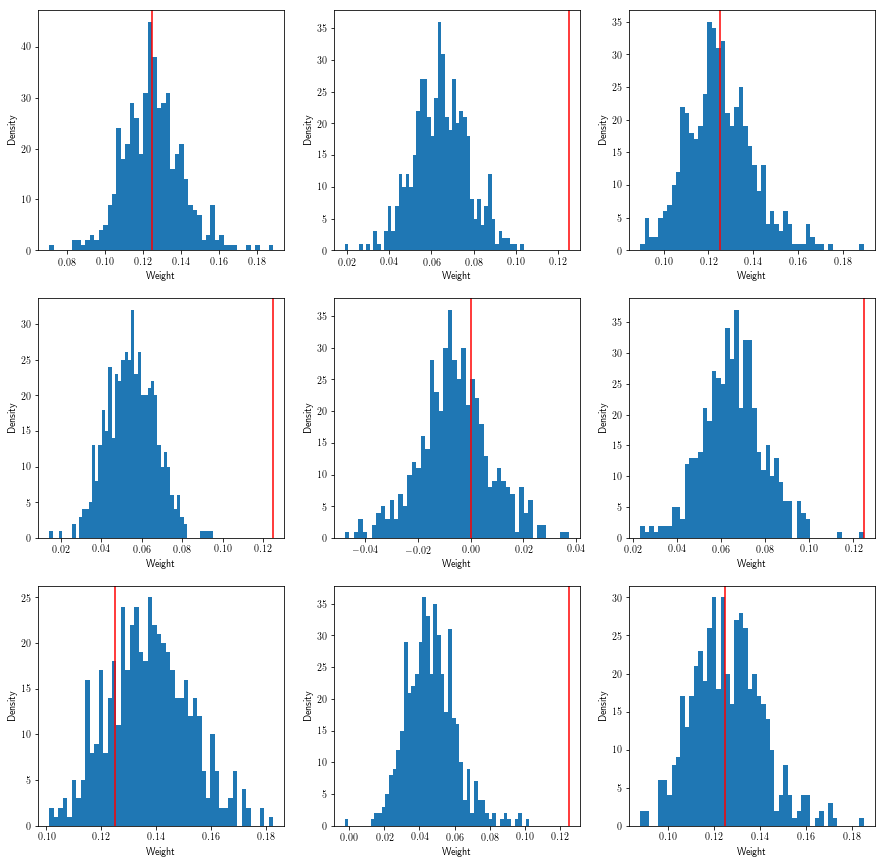

In [9]:
with open("unfrozen_convolution_relu.pl", "rb") as handle:
    results = pickle.load(handle)
w = results["conv_params"]
a,b,c,d,e,f,g,h,i = [], [], [], [], [], [], [], [], []
for par in w["weight"]:
    left_corner = par[0, 0, 0, 0]
    sign_convention = np.sign(left_corner)
    a.append(np.abs(left_corner))
    b.append(par[0, 0, 0, 1] * sign_convention)
    c.append(par[0, 0, 0, 2] * sign_convention)
    d.append(par[0, 0, 1, 0] * sign_convention)
    e.append(par[0, 0, 1, 1] * sign_convention)
    f.append(par[0, 0, 1, 2] * sign_convention)
    g.append(par[0, 0, 2, 0] * sign_convention)
    h.append(par[0, 0, 2, 1] * sign_convention)
    i.append(par[0, 0, 2, 2] * sign_convention)
a,b,c,d,e,f,g,h,i = [np.array(_)[np.abs(np.array(_)) < 0.4] for _ in [a,b,c,d,e,f,g,h,i]]
fig, axs = plt.subplots(3, 3)
print("axs", type(axs))
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].hist(a, 50)
axs[0, 0].axvline(1/8, color = "r")
axs[0, 1].hist(b, 50)
axs[0, 1].axvline(1/8, color = "r")
axs[0, 2].hist(c, 50)
axs[0, 2].axvline(1/8, color = "r")
axs[1, 0].hist(d, 50)
axs[1, 0].axvline(1/8, color = "r")
axs[1, 1].hist(e, 50)
axs[1, 1].axvline(0, color = "r")
axs[1, 2].hist(f, 50)
axs[1, 2].axvline(1/8, color = "r")
axs[2, 0].hist(g, 50)
axs[2, 0].axvline(1/8, color = "r")
axs[2, 1].hist(h, 50)
axs[2, 1].axvline(1/8, color = "r")
axs[2, 2].hist(i, 50)
axs[2, 2].axvline(1/8, color = "r")
for i in range(3):
    for j in range(3):
        axs[i, j].set_xlabel("Weight")
        axs[i, j].set_ylabel("Density")

In [24]:
import pickle
# run_mode = "frozen_convolution_no_center_relu"
# run_mode = "frozen_convolution_pretrained_relu"
run_mode = "unfrozen_convolution_relu"
with open(f"colab/hyperparameters_{run_mode}.pl", "rb") as handle:
    hyper = pickle.load(handle)

In [25]:
from ax import RangeParameter, ParameterType
from ax.service.ax_client import AxClient
from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from ax.utils.notebook.plotting import render, init_notebook_plotting

ax_client = AxClient()
ax_client = ax_client.from_json_snapshot(hyper["axclient"])

In [23]:
#pre-trained
ax_client.get_best_parameters()

({'batch_size': 100,
  'train_size': 5000,
  'n_epochs': 250,
  'lr': 0.019139156605462126,
  'weight_decay': 0.00012219683722069016,
  'betas0': 0.20000000000000004,
  'betas1': 0.20000000000000004},
 ({'objective': 0.9051331311645764},
  {'objective': {'objective': 4.2175022319999685e-05}}))

In [12]:
#unfrozen_convolution_relu
ax_client.get_best_parameters()

({'batch_size': 3275,
  'train_size': 5000,
  'n_epochs': 250,
  'lr': 0.020528648792118652,
  'weight_decay': 9.502157496171884e-05,
  'betas0': 0.011465812924984647,
  'betas1': 1e-05},
 ({'objective': 0.9049023688701238},
  {'objective': {'objective': 4.071488060232958e-05}}))

In [15]:
#frozen_convolution_no_center_relu
ax_client.get_best_parameters()

({'batch_size': 100,
  'train_size': 5000,
  'n_epochs': 179,
  'lr': 0.012260217963921459,
  'weight_decay': 5.462537700249329e-05,
  'betas0': 0.19999999999999593,
  'betas1': 0.19999999999999593},
 ({'objective': 0.8971875823733833},
  {'objective': {'objective': 0.00015326518731127828}}))